In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100
gamma = 0.05

Preparing for a Measured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.164 Seconds
Building LP ...
	Done. Took 0.129 Seconds
Building M ...
	Done. Took 0.191 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Done. Took 9.662 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -1.926*(-0.015)^t + -3.058*(-0.005)^t + 1.355*(-0.040)^t + -0.200*(0.073)^t + -1.378*(-0.021)^t + 2.649*(-0.001)^t + 2.558346 * delta(t,0)
		RMSE = 0.000
		Matlab: [-1.93 -0.01 -3.06 -0.    1.35 -0.04 -0.2   0.07 -1.38 -0.02  2.65 -0.  ]
	Done. Took 159.102 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): -2.182*(0.008)^t + 0.872*(0.718)^t + -4.900*(-0.017)^t + -1.416*(0.564)^t + 0.642*(-0.042)^t + 7.359*(0.016)^t + -0.373621 * delta(t,0)
		RMSE = 0.002
		Matlab: [-2.18  0.01  0.87  0.72 -4.9  -0.02 -1.42  0.56  0.64 -0.04  7.36  0.02]
	Done. Took 202.875 Seconds
Learning Convolution for Q(2,1) .

{0: {1: array([-1.93, -0.01, -3.06, -0.  ,  1.35, -0.04, -0.2 ,  0.07, -1.38, -0.02,  2.65, -0.  ]),
  2: array([-2.18,  0.01,  0.87,  0.72, -4.9 , -0.02, -1.42,  0.56,  0.64, -0.04,  7.36,  0.02])},
 1: {0: array([ 0.85, -0.01, -0.39,  0.21, -3.1 ,  0.09,  0.24,  0.18, -1.84,  0.17,  3.61,  0.15]),
  2: array([ 1.41, -0.02,  3.72, -0.01,  1.03, -0.04, -4.3 , -0.02, -1.69, -0.04,  0.71, -0.04])},
 2: {0: array([ 6.84,  0.84, -2.94, -0.03, -2.31,  0.78, -4.71, -0.01,  0.23,  0.11, -4.53,  0.87]),
  1: array([ -6.69,   0.26,  12.91,   0.52, -20.  ,   0.76,   7.31,   0.85,  -4.22,  -0.03,   4.55,   0.85])}}

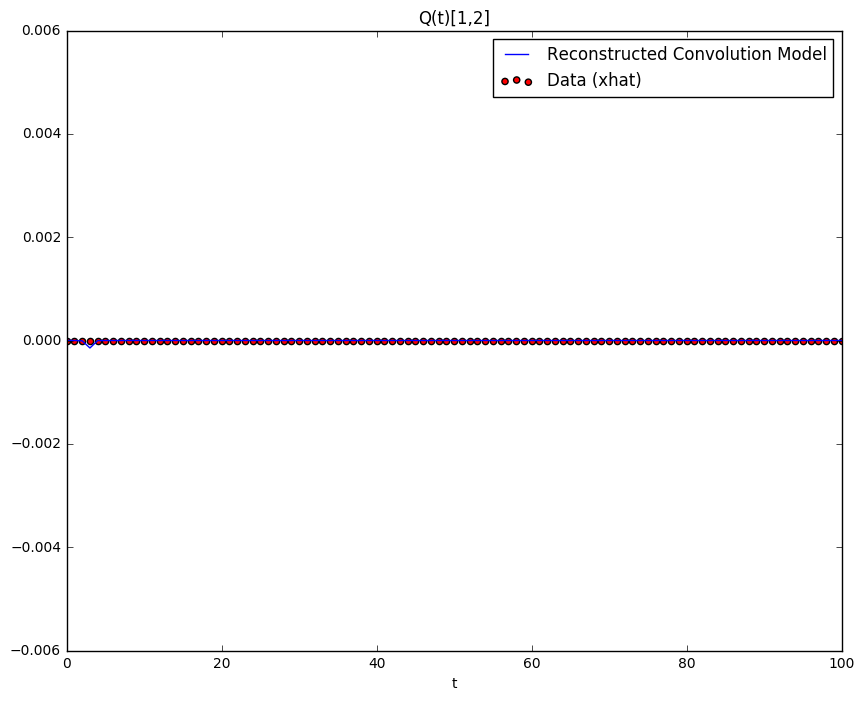

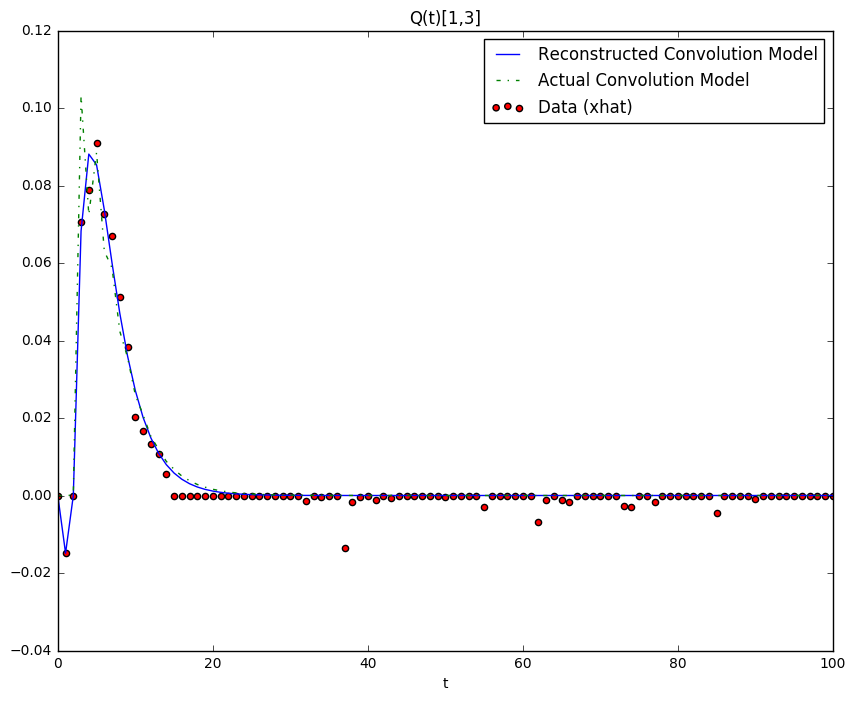

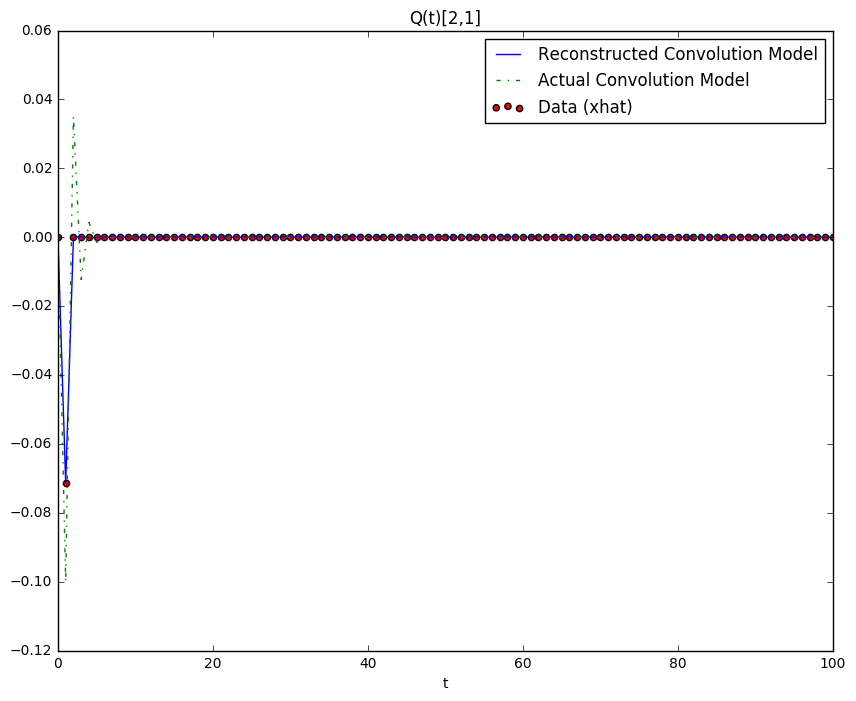

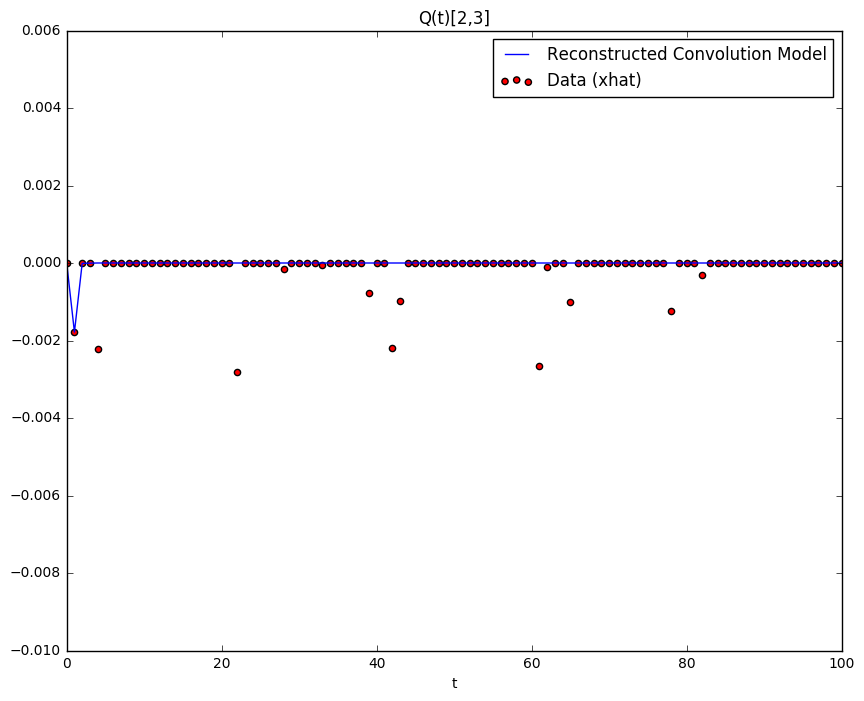

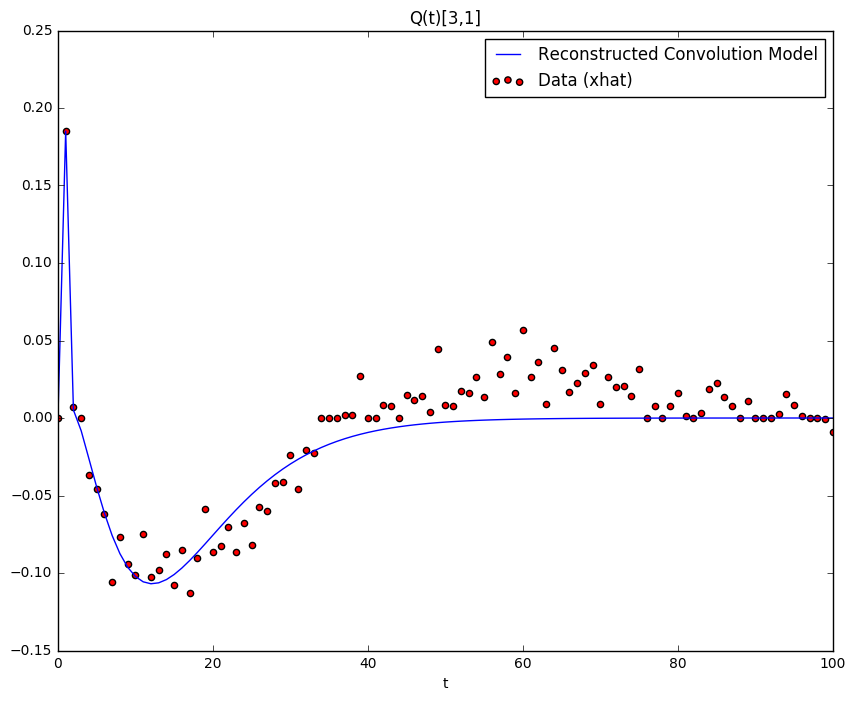

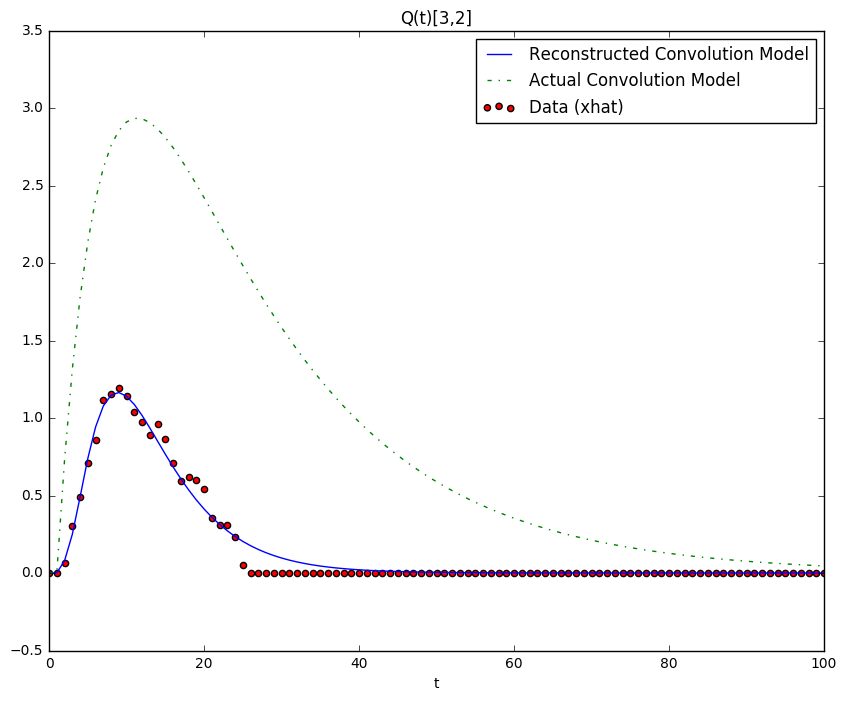

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=20, order=6, real_params=real_params, robust=True)
recon.measured(y + np.random.randn(u.shape[0], u.shape[1]) * gamma, u, plot=True)  #, ij=(1,3))